**OUTLIERS ARE THOSE DATA THAT BEHAVE DIFFERENTLY THAT ANY OTHER DATA**
- our model may be distracted from this type of data

they are detected using:
- Z-score
- percentile method
- IQR based method
- Winston bation method

# zscore method

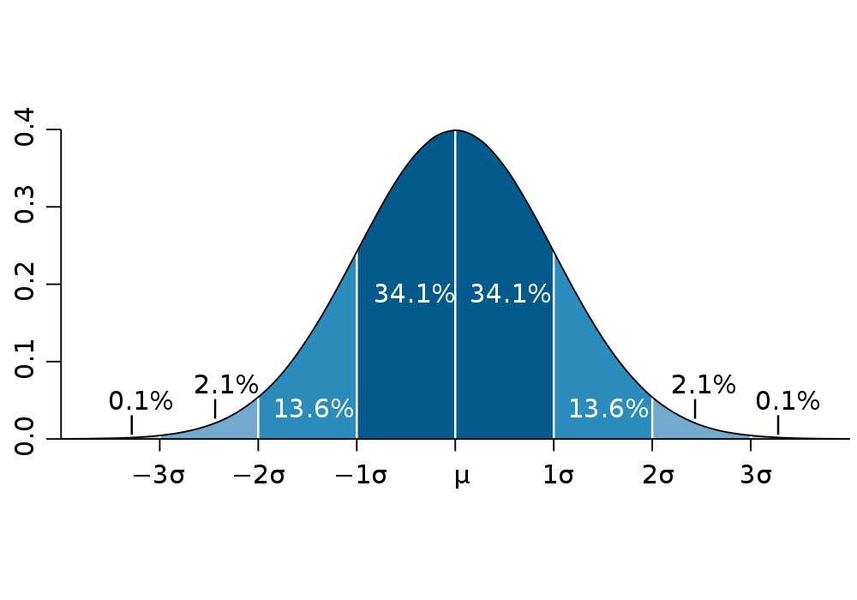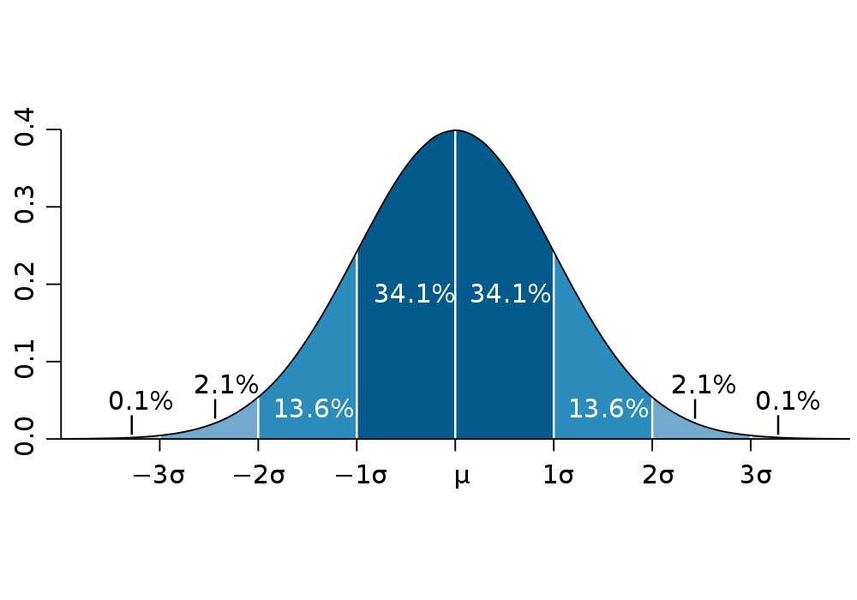

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')
df.sample(5)

,cgpa,placement_exam_marks,placed
286,6.29,58.0,1
797,8.14,20.0,1
409,6.92,24.0,0
519,6.60,8.0,1
314,7.43,14.0,1


/var/folders/mf/wdgfkj3x5pd6c4_5_ktw0t6w0000gn/T/ipykernel_12202/1920734389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'], ax=axes[0])
/var/folders/mf/wdgfkj3x5pd6c4_5_ktw0t6w0000gn/T/ipykernel_12202/1920734389.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_ex

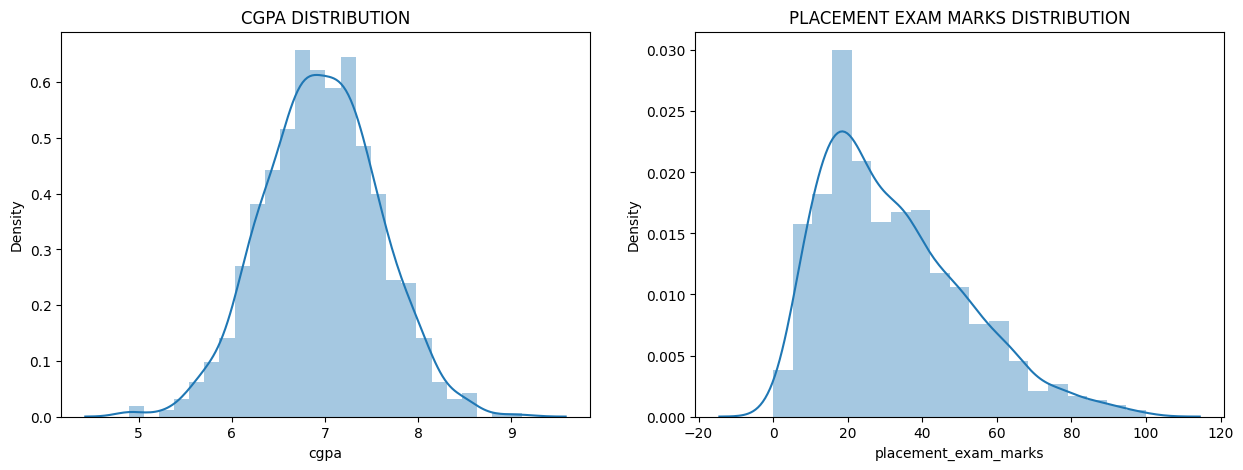

In [3]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
sns.distplot(df['cgpa'], ax=axes[0])
axes[0].set_title('CGPA DISTRIBUTION')
sns.distplot(df['placement_exam_marks'], ax = axes[1])
axes[1].set_title('PLACEMENT EXAM MARKS DISTRIBUTION')
fig.set_tight_layout
plt.show()

so the z-score method can be applied only on first column as it is normally distributed

In [4]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [5]:
mean = df['cgpa'].mean()
std = df['cgpa'].std()

In [6]:
high = mean + 3 * std
low = mean - 3 * std

In [7]:
low

np.float64(5.113546374602832)

In [8]:
# finding the outliers
df[(df['cgpa'] > high) | (df['cgpa'] < low)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


**trimming**

In [10]:
new_df = df[(df['cgpa'] < high) & (df['cgpa'] > low)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


/var/folders/mf/wdgfkj3x5pd6c4_5_ktw0t6w0000gn/T/ipykernel_12202/4222339323.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['cgpa'], ax=axes[0])
/var/folders/mf/wdgfkj3x5pd6c4_5_ktw0t6w0000gn/T/ipykernel_12202/4222339323.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['plac

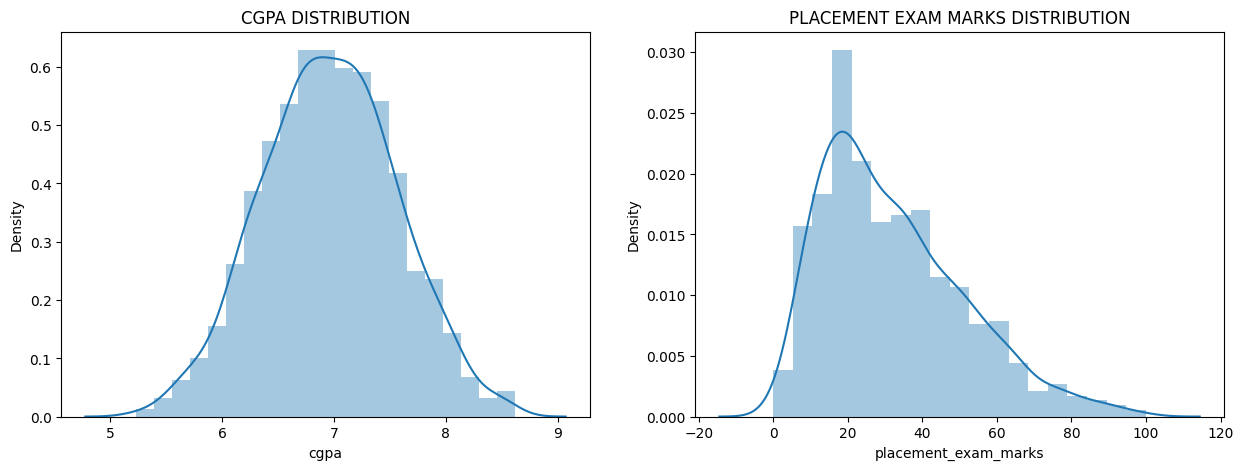

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
sns.distplot(new_df['cgpa'], ax=axes[0])
axes[0].set_title('CGPA DISTRIBUTION')
sns.distplot(new_df['placement_exam_marks'], ax = axes[1])
axes[1].set_title('PLACEMENT EXAM MARKS DISTRIBUTION')
fig.set_tight_layout
plt.show()

**z-score method**

In [12]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [13]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [14]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [15]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


**capping**

In [16]:
upper_limit = high
lower_limit = low

In [18]:
lower_limit

np.float64(5.113546374602832)

`np.where` takes three arguments :
- condition
- if the condition is true then the statement
- else statement

In [19]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit,
    upper_limit,
    np.where(
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
    )
)

/var/folders/mf/wdgfkj3x5pd6c4_5_ktw0t6w0000gn/T/ipykernel_12202/1920734389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'], ax=axes[0])
/var/folders/mf/wdgfkj3x5pd6c4_5_ktw0t6w0000gn/T/ipykernel_12202/1920734389.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_ex

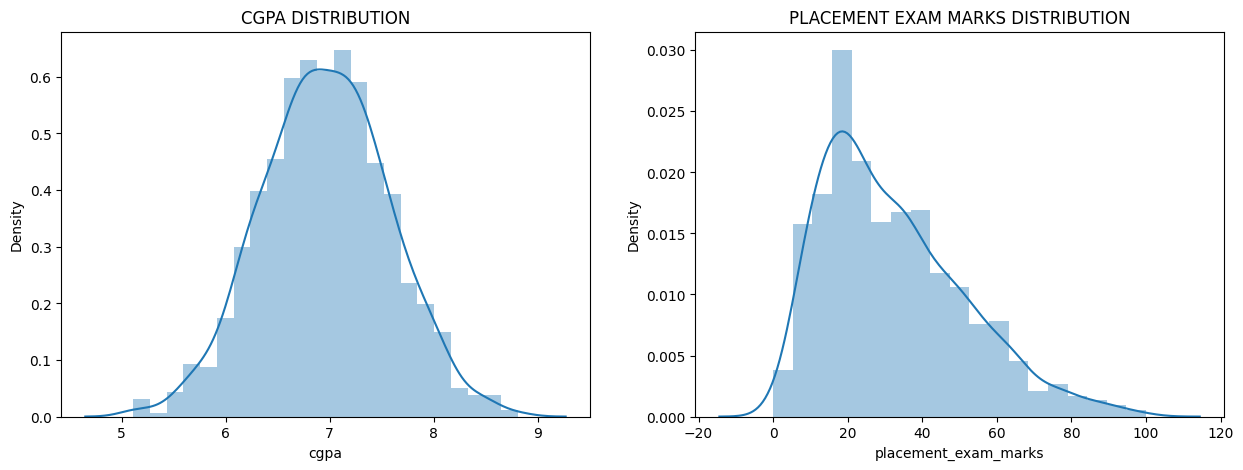

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
sns.distplot(df['cgpa'], ax=axes[0])
axes[0].set_title('CGPA DISTRIBUTION')
sns.distplot(df['placement_exam_marks'], ax = axes[1])
axes[1].set_title('PLACEMENT EXAM MARKS DISTRIBUTION')
fig.set_tight_layout
plt.show()